In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("C:/Users/dimri/OneDrive/Desktop/logregacm/framingham.csv")


In [31]:
df.info


<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [32]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

no categorical values 

to handle missing values


In [35]:
df.shape

(4238, 16)

In [36]:

df = df.fillna(df.mean())

In [37]:
missing_values = df.isnull().sum()
print(missing_values)


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [38]:
x = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

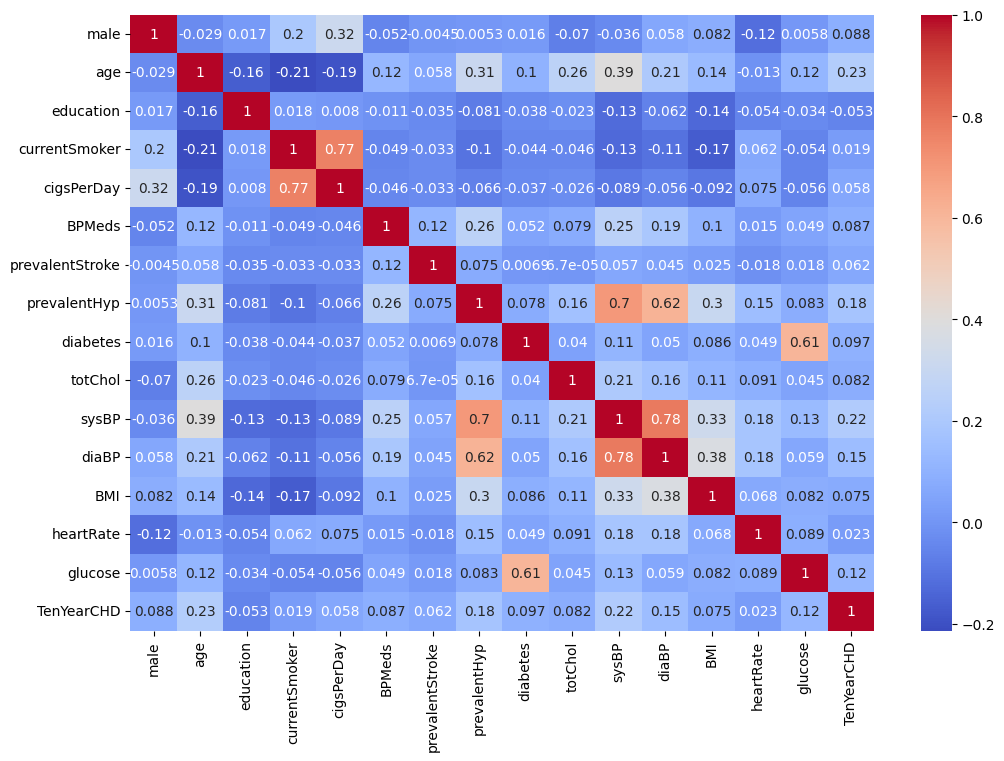

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


<Axes: xlabel='age', ylabel='totChol'>

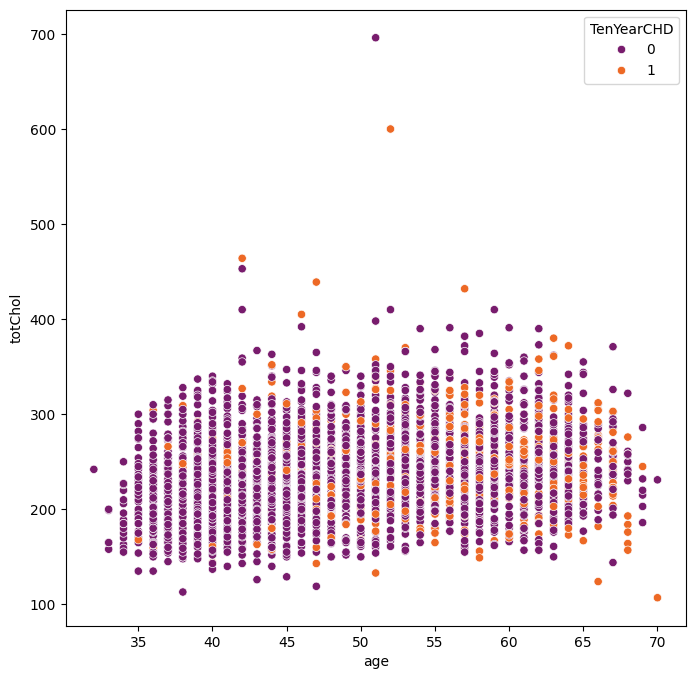

In [46]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.scatterplot(x='age', y='totChol', hue='TenYearCHD', palette='inferno', data=df)


In [40]:
plt.figure(figsize = (8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='sysBP', ylabel='BMI'>

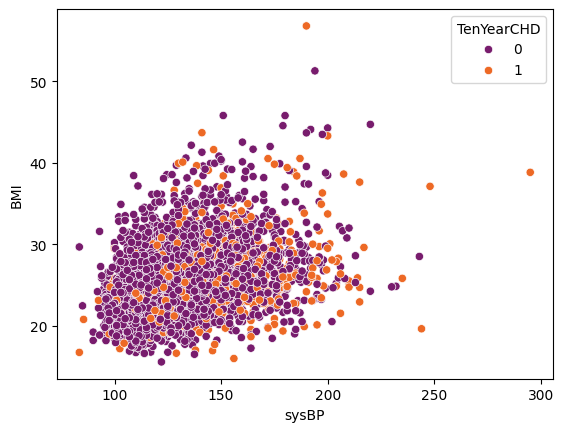

In [41]:
sns.scatterplot(x='sysBP', y='BMI', hue='TenYearCHD', palette='inferno', data=df)



<Axes: xlabel='glucose', ylabel='heartRate'>

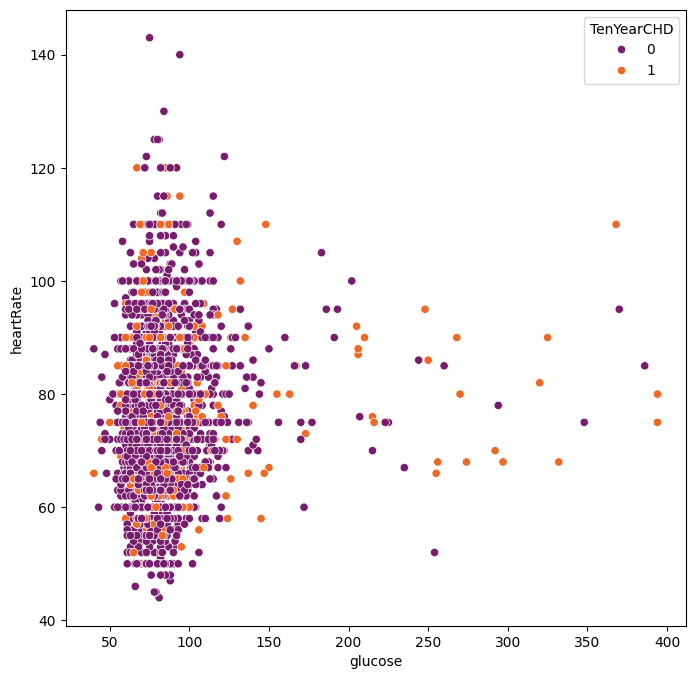

In [42]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='glucose', y='heartRate', hue='TenYearCHD', palette='inferno', data=df)


In [43]:
plt.figure(figsize = (8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='age', ylabel='cigsPerDay'>

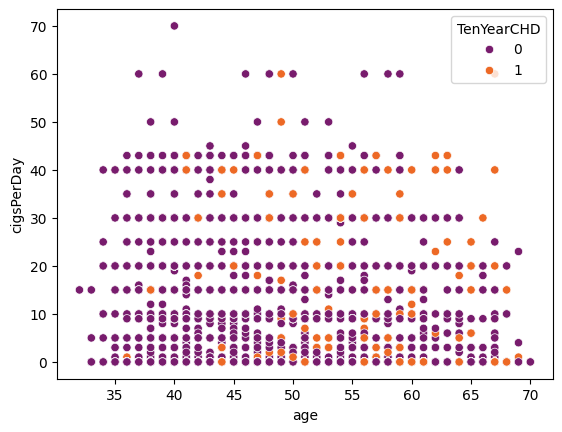

In [44]:
sns.scatterplot(x='age', y='cigsPerDay', hue='TenYearCHD', palette='inferno', data=df)


In [47]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [48]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3390, 15)
(3390,)
(848, 15)
(848,)


In [49]:

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [50]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

In [51]:

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [52]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(15, 3390)
(1, 3390)
(15, 848)
(1, 848)


In [53]:

def Sigmoid(X):
    return 1/(1+np.exp(-X))

In [54]:

def model(X, Y, lr, iterations):
    m = X_train.shape[1] #total no. of training exmples fed to algorith 
    n = X_train.shape[0] #how many features


    #initialising
    W = np.zeros((n,1))
    B = 0 


    cost_list=[]

    for i in range (iterations): 
        Z = np.dot(W.T,X)+B
        Y_cap=Sigmoid(Z)


        #loss fn

        cost = -(1/m)*np.sum(Y*np.log(Y_cap)+(1-Y)*np.log(1-Y_cap))


        #gradient descent
        dW = (1/m)*np.dot(Y_cap-Y, X.T)
        dB = (1/m)*np.sum(Y_cap - Y)

        W = W - lr*dW.T
        B = B - lr*dB

        cost_list.append(cost)  #just to be able to see if cost fn is decreasing on every iteration or not
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return W,B, cost_list

In [55]:
iterations = 1000


In [56]:

lr = 0.00015


In [57]:

W,B,cost_list = model(X_train,Y_train,lr=lr,iterations=iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  100 iteration is :  0.4314963324965935
cost after  200 iteration is :  0.4251745004368823
cost after  300 iteration is :  0.4213668901433832
cost after  400 iteration is :  0.41894838169917314
cost after  500 iteration is :  0.41734022579076835
cost after  600 iteration is :  0.41622558946287214
cost after  700 iteration is :  0.41542368428453363
cost after  800 iteration is :  0.4148272362111304
cost after  900 iteration is :  0.4143702166396992


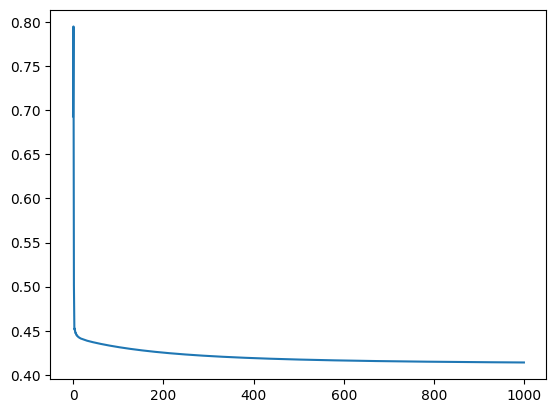

In [58]:
plt.plot(np.arange(iterations),cost_list)

In [59]:

def accuracy(X,Y,W,B):
    Z = np.dot(W.T,X)+B
    Y_cap = Sigmoid(Z)
    Y_cap=Y_cap>0.5 
    Y_cap = np.array(Y_cap,dtype = 'int64')
    acc = (1-np.sum(np.absolute(Y_cap-Y))/Y.shape[1])*100
    print('accuracy is :  ',round(acc, 2),'%')

In [60]:
accuracy(X_test,Y_test,W,B)

accuracy is :   85.26 %
